In [2]:
# Install the xlrd library (only needed for reading .xls Excel files)
!pip install xlrd

# Import the pandas library for data handling
import pandas as pd

# Define the path to the excel file
file_path = 'Synthetic_Batch_Data.xls'

# Load the excel file into a DataFrame using the xlrd engine
#(xlrd is required for legacy .xls formats, not for xlsx)
#Specify engine as 'xlrd' because it's a .xls (older Excel format)
exceldoc = pd.read_excel(file_path, engine = 'xlrd')

# Remove rows where all columns have missing values (NaNs)
exceldoc = exceldoc.dropna()

# Replace any remaining NaNs with the string 'None'
exceldoc = exceldoc.fillna(value = 'None')

# Display the first few rows of the cleaned dataset
print(exceldoc.head())



    Batch ID Batch Date  Deviation Occurred      Deviation Type  Severity  \
0  BMSD-0001 2024-09-26                True    Filtration Issue     Major   
1  BMSD-0002 2024-08-30                True  Particulate Matter     Major   
2  BMSD-0003 2024-04-28                True   Sterility Failure     Major   
3  BMSD-0004 2024-06-30                True  Particulate Matter  Critical   
6  BMSD-0007 2024-07-27                True        pH Deviation     Minor   

                  Impact  
0        Delayed Release  
1  Reprocessing Required  
2  Reprocessing Required  
3  Reprocessing Required  
6  Reprocessing Required  


# Chunk 1: Inspecting the Dataset

In [3]:
# Optional: View structure and dimentions of the dataset
print(exceldoc.info()) # column names, data types, and non-null counts
print(exceldoc.shape)  # (rows, columns)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 180
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Batch ID            93 non-null     object        
 1   Batch Date          93 non-null     datetime64[ns]
 2   Deviation Occurred  93 non-null     bool          
 3   Deviation Type      93 non-null     object        
 4   Severity            93 non-null     object        
 5   Impact              93 non-null     object        
dtypes: bool(1), datetime64[ns](1), object(4)
memory usage: 4.5+ KB
None
(93, 6)


# Chunk 2: Checking for Missing Values

In [4]:
# Check how many missing values exist in each column
print(exceldoc.isna().sum())

Batch ID              0
Batch Date            0
Deviation Occurred    0
Deviation Type        0
Severity              0
Impact                0
dtype: int64


# Chunk 3: Dropping rows missing Severity or Impact info

In [5]:
# Drop rows that are missing values in the 'Severity' or 'Impact' columns
# This ensures all records used in analysis contain key quality metrics
clean_excel = exceldoc.dropna(subset = ['Severity', 'Impact'], inplace = True)


# Chunk 4: Confirming new shape after cleanup

In [6]:
#Confirm new shape after dropping incomplete rows
print(exceldoc.shape)

(93, 6)


# Chunk 5: Count unique values for two key columns

In [7]:
#Count how many times each Severity level appears
print(exceldoc['Severity'].value_counts())

#Count how many times each Impact level appears
print(exceldoc['Impact'].value_counts())

Major       37
Minor       34
Critical    22
Name: Severity, dtype: int64
Reprocessing Required    26
No Impact                25
Delayed Release          21
Scrapped                 21
Name: Impact, dtype: int64


# Chunk 6: Clean text column for consistency

In [8]:
#Standardize the values in the 'Deviation Type' column by:
# - Removing extra spaces
# - Converting all text to lowercase
# This ensures that entries like "Operator Error" and "operator error" are treated as the same category. 
exceldoc['Deviation Type'] = exceldoc['Deviation Type'].str.strip().str.lower()

#Count how many times each unique Deviation Type appears after standardization
deviation_counts = exceldoc['Deviation Type'].value_counts()
print(deviation_counts)


buffer preparation error      15
equipment failure             12
operator error                10
sterility failure              9
temperature excursion          9
filtration issue               8
ph deviation                   8
particulate matter             7
bioburden exceedance           7
out of specification (oos)     6
microbial contamination        2
Name: Deviation Type, dtype: int64


# Chunk 7: Visualize top deviation types

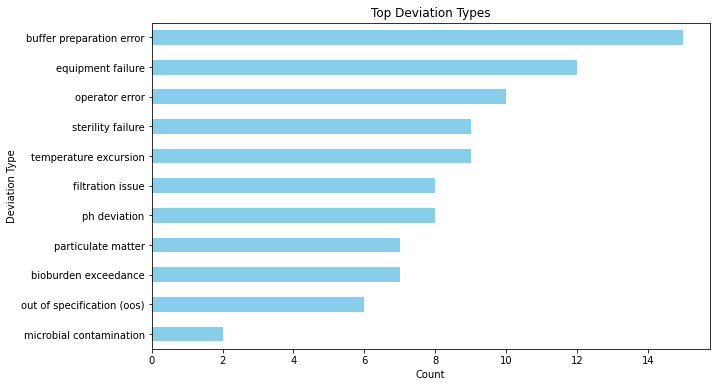

In [9]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

#Create a horizontal bar chart to show the most common deviation types
plt.figure(figsize = (10,6))
deviation_counts.plot(kind = 'barh', color = 'skyblue')

#Add titles and labels for clarity
plt.title('Top Deviation Types')
plt.xlabel('Count')
plt.ylabel('Deviation Type')

#Flip the y-axis to show the most frequent deviation at the top
plt.gca().invert_yaxis()
plt.tight_layout
plt.show()

# Chunk 8: Visualize severity breakdown

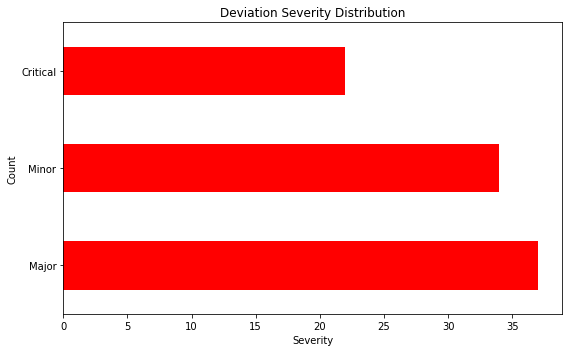

In [10]:
#Count the number of deviations per severity level
severity_counts = exceldoc['Severity'].value_counts()

#Plot a horizontal bar chart of severity distribution
plt.figure(figsize = (8,5))
severity_counts.plot(kind = 'barh', color = 'red')
plt.title('Deviation Severity Distribution')
plt.xlabel('Severity')
plt.ylabel('Count')
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

# Chunk 9: Visualize impact breakdown

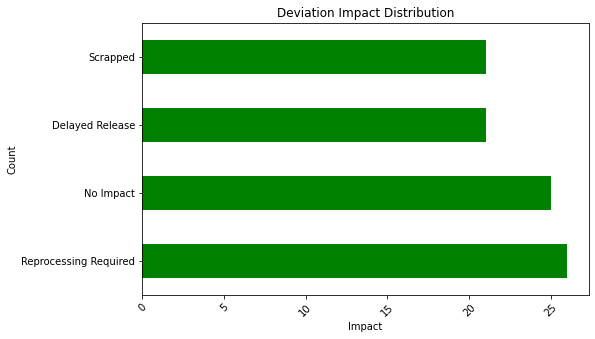

In [11]:
#Count the number of deviations per impact level
impact_counts = exceldoc['Impact'].value_counts()

#Plot a horizontal bar chart of impact distribution
plt.figure(figsize = (8,5))
impact_counts.plot(kind = 'barh', color = 'green')
plt.title('Deviation Impact Distribution')
plt.xlabel('Impact')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.gca
plt.show()

# Chunk 10: Create a severity vs. impact correlation table and heatmap

In [12]:
#Create a cross tabulation between Severity and Impact
cross_tab = pd.crosstab(exceldoc['Severity'], exceldoc['Impact'])
print(cross_tab)

Impact    Delayed Release  No Impact  Reprocessing Required  Scrapped
Severity                                                             
Critical                3          7                      3         9
Major                  11          9                     14         3
Minor                   7          9                      9         9


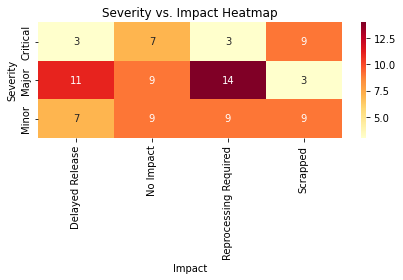

In [13]:
#Visualize the cross-tab as a heatmap using seaborn
import seaborn as sns

#Generate annotated heatmap with custom color palette
sns.heatmap(cross_tab, annot = True, fmt = 'd', cmap = 'YlOrRd')
plt.title('Severity vs. Impact Heatmap')
plt.xlabel('Impact')
plt.ylabel('Severity')
plt.tight_layout()
plt.show()

# **NLP-Powered Batch Deviation Analysis**

## **Overview**
This project analyzes synthetic batch deviation data from a GMP manufacturing process using Python for data cleaning, NLP-based text normalization, and exploratory data analysis (EDA).

The goal is to extract meaningul insights from deviation logs - helping quality and compliance teams understand trends in severity, impact, and root cause. 

---

## **Key Visuals**
- **Top deviation types ** (bar chart)
- **Severity breakdown** (red bar chart)
- **Impact breakdown** (green bar chart)
- **Heatmap: Severity vs. Impact** (annotated heat map)

---

## **Insights**
- **Major deviations** are most often associated with **reprocessing required**.
- **Critical deviations** frequenty result in *scrapping batches* or *delayed release*.
- A small subset of deviation types accounts for most batch issues, suggesting high-leverage opportunities for SOP improvement or equipment calibration.

---

## **Final Notes**
This notebook demonstrates:
- Data import and cleaning using 'pandas'.
- Text normalization using Python string methods.
- Data Visualization with 'matplotlib' and 'seaborn'.
- Exploratory insights relevant to quality control and GMP compliance.


> All code was written and executed in a local Jupyter Notebook environment.
